In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
User_details_df = pd.read_excel('/content/drive/MyDrive/DataAnalystInternAssignment/Uplaince.xlsx',sheet_name = 0)
Cooking_session_df = pd.read_excel('/content/drive/MyDrive/DataAnalystInternAssignment/Uplaince.xlsx',sheet_name = 1)
Orders_details_df = pd.read_excel('/content/drive/MyDrive/DataAnalystInternAssignment/Uplaince.xlsx',sheet_name = 2)

#EDA (Exploratory Data Analysis)

In [42]:
# check for missing values and dublicates if present
## Missing values
User_details_df.isnull().sum().sum(), Cooking_session_df.isnull().sum().sum(), Orders_details_df.isnull().sum().sum()

(0, 0, 2)

In [43]:
User_details_df.duplicated().sum().sum(), Cooking_session_df.duplicated().sum().sum(), Orders_details_df.duplicated().sum().sum()

(0, 0, 0)

In [44]:
#The Rating column in the Order Details dataset contains null values.
Orders_details_df[Orders_details_df['Rating'].isnull()]

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008


In [45]:
# Filling mean values to rating columns
Orders_details_df['Rating'] = Orders_details_df['Rating'].fillna(Orders_details_df['Rating'].mean())

In [46]:
# Two users order details are missing from this data.
merged_df = pd.merge(User_details_df,Orders_details_df,on='User ID',how='left')
merged_df = pd.merge(merged_df,Cooking_session_df,on='User ID',how='left')
merged_df

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Order ID,...,Time of Day,Rating,Session ID_x,Session ID_y,Dish Name_y,Meal Type_y,Session Start,Session End,Duration (mins),Session Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1001.0,...,Night,5.000000,S001,S001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1001.0,...,Night,5.000000,S001,S004,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1001.0,...,Night,5.000000,S001,S009,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40.0,4.9
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1004.0,...,Morning,4.000000,S004,S001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1004.0,...,Morning,4.000000,S004,S004,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2
5,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1004.0,...,Morning,4.000000,S004,S009,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40.0,4.9
6,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1009.0,...,Night,5.000000,S009,S001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5
7,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1009.0,...,Night,5.000000,S009,S004,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2
8,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,1009.0,...,Night,5.000000,S009,S009,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40.0,4.9
9,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,1002.0,...,Day,4.000000,S002,S002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20.0,4.0


In [53]:
merged_df = merged_df.dropna()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            38 non-null     object        
 1   User Name          38 non-null     object        
 2   Age                38 non-null     int64         
 3   Location           38 non-null     object        
 4   Registration Date  38 non-null     datetime64[ns]
 5   Phone              38 non-null     object        
 6   Email              38 non-null     object        
 7   Favorite Meal      38 non-null     object        
 8   Total Orders       38 non-null     int64         
 9   Order ID           38 non-null     float64       
 10  Order Date         38 non-null     datetime64[ns]
 11  Meal Type_x        38 non-null     object        
 12  Dish Name_x        38 non-null     object        
 13  Order Status       38 non-null     object        
 14  Amount (USD)     

In [54]:
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,38.0,33.342105,25.0,28.0,33.0,37.25,42.0,5.832233
Registration Date,38,2023-03-12 23:22:06.315789568,2023-01-15 00:00:00,2023-02-20 00:00:00,2023-03-10 00:00:00,2023-04-05 00:00:00,2023-08-11 00:00:00,NaN
Total Orders,38.0,10.973684,5.0,8.0,11.0,13.5,15.0,2.917671
Order ID,38.0,1007.394737,1001.0,1004.0,1007.5,1010.75,1016.0,4.252436
Order Date,38,2024-12-03 22:44:12.631578880,2024-12-01 00:00:00,2024-12-02 00:00:00,2024-12-04 00:00:00,2024-12-05 18:00:00,2024-12-08 00:00:00,NaN
Amount (USD),38.0,11.052632,7.0,9.0,11.0,12.875,15.0,2.479073
Rating,38.0,4.255639,4.0,4.0,4.0,4.285714,5.0,0.40291
Session Start,38,2024-12-04 13:09:28.421052672,2024-12-01 12:00:00,2024-12-02 19:30:00,2024-12-04 13:30:00,2024-12-06 04:45:00,2024-12-08 19:30:00,NaN
Session End,38,2024-12-04 13:38:48.947368448,2024-12-01 12:20:00,2024-12-02 20:10:00,2024-12-04 13:50:00,2024-12-06 05:17:30,2024-12-08 20:10:00,NaN
Duration (mins),38.0,29.342105,10.0,20.0,30.0,40.0,45.0,10.277965


# UNIVARIATE ANALYSIS

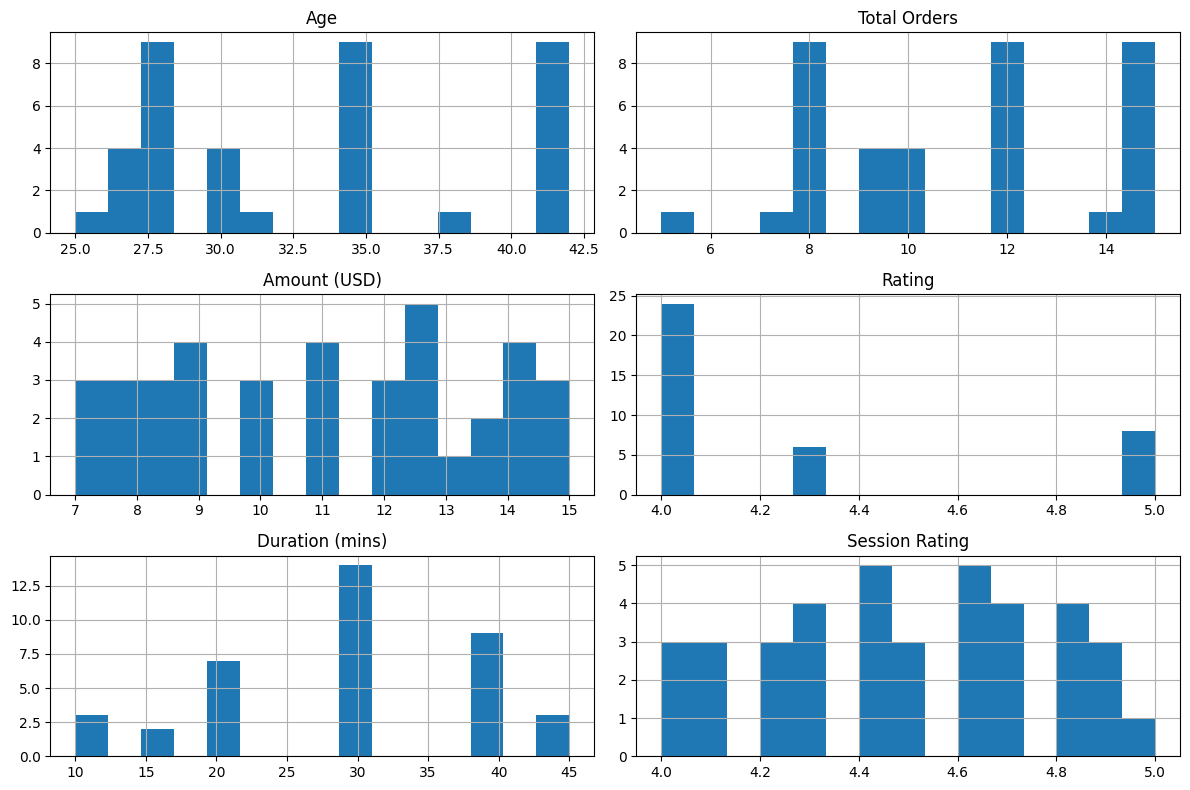

In [52]:
numerical_cols = merged_df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols!='Order ID']
merged_df[numerical_cols].hist(bins=15,figsize=(12,8))
plt.tight_layout()
plt.show()

# Insights from the histogram

## Age
1. The age distribution shows two prominent peaks around 27, 35 and 41 years.
2. The ages are mostly concentrated between 25 and 35 years, with fewer individuals above 37.5 years.

##Total Orders
The total orders have peaks at 8, 10, and 12 orders.
1. There is a smaller peak at 14 orders.
2.  The distribution is somewhat bimodal, with significant counts at lower and higher ends.

##Amount (USD)
1. The amount spent shows peaks around 9 and 14 USD.
2. There are gaps in the distribution, indicating some amounts are less common.
3. The amounts are spread between 7 and 15 USD, with fewer transactions around 11 USD.

##Rating
1. The ratings are predominantly at 4.0, with a smaller peak at 5.0.
2. There is a significant concentration of ratings at 4.0, indicating a common rating value.

## Duration (mins)
1. The duration of sessions shows a peak around 30 minutes.
2. There are smaller peaks around 20 and 40 minutes.
3.  The durations are spread between 10 and 45 minutes, with fewer sessions around 15 and 35 minutes.

##Session Rating
1. The session ratings are spread between 4.0 and 5.0.
2. There are peaks around 4.0, 4.4, and 4.8.
3. The distribution is relatively uniform, with slight variations in frequency.

In [55]:
merged_df.Location.unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Seattle',
       'Austin', 'Boston', 'Miami'], dtype=object)

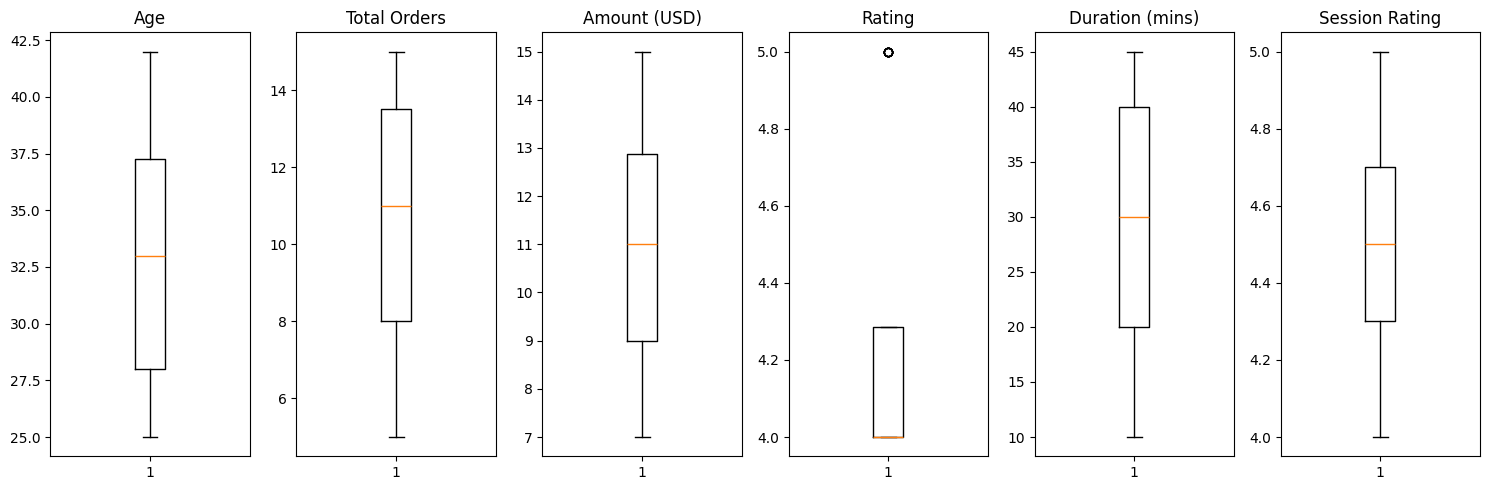

In [59]:
fig, axes = plt.subplots(1,len(numerical_cols),figsize=(15,5))

for i, col in enumerate(numerical_cols):
  axes[i].boxplot(merged_df[col])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

There are no outliers in our data, excluding the Ratings column. However, removing the highest or lowest ratings is not recommended, as they play a vital role in understanding user feedback and trends.

In [62]:
merged_df.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Order ID', 'Order Date',
       'Meal Type_x', 'Dish Name_x', 'Order Status', 'Amount (USD)',
       'Time of Day', 'Rating', 'Session ID_x', 'Session ID_y', 'Dish Name_y',
       'Meal Type_y', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating'],
      dtype='object')

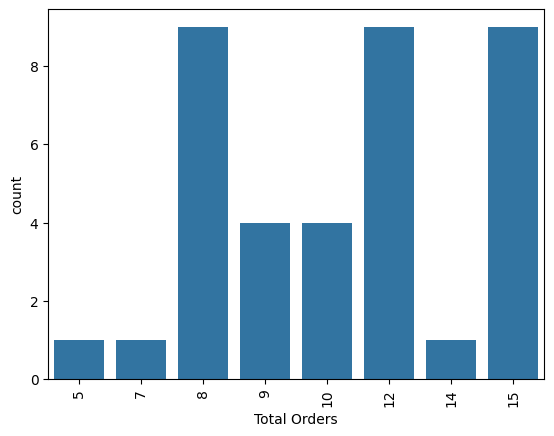

In [63]:
sns.countplot(data=merged_df,x='Total Orders')
plt.xticks(rotation=90)
plt.show()

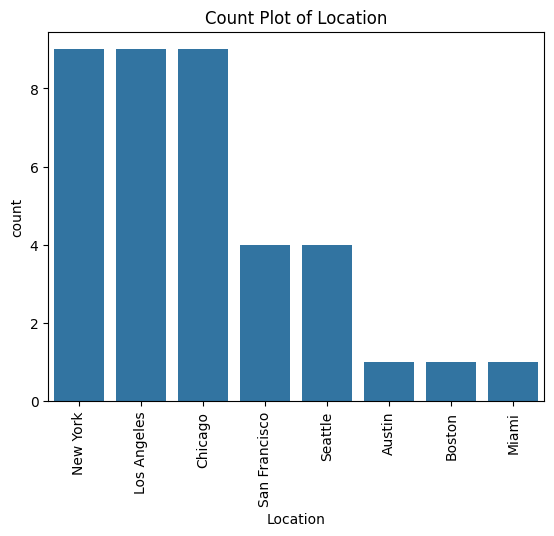

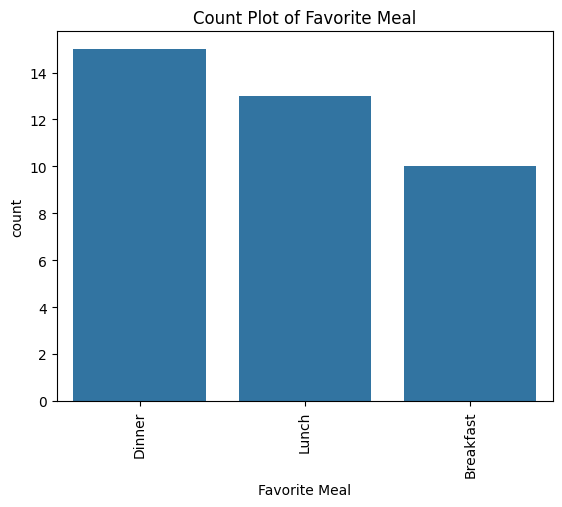

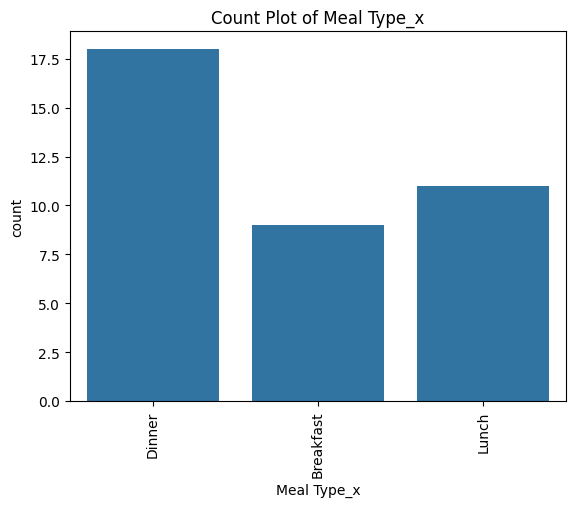

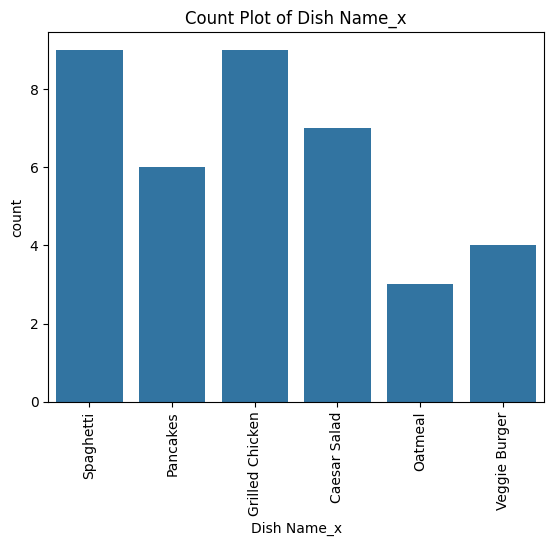

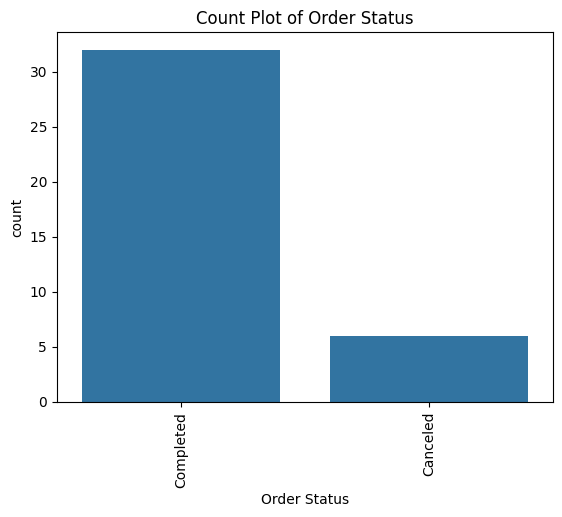

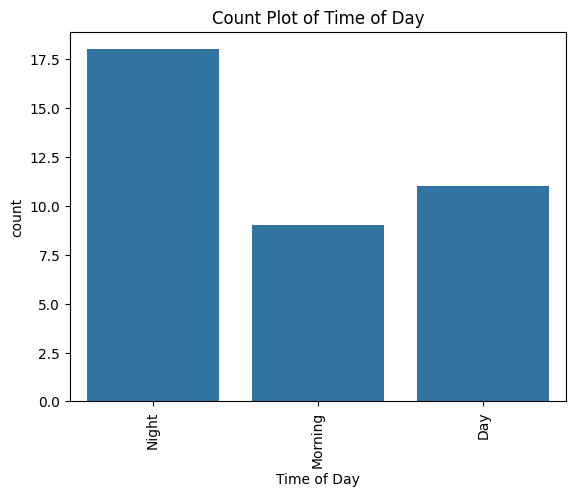

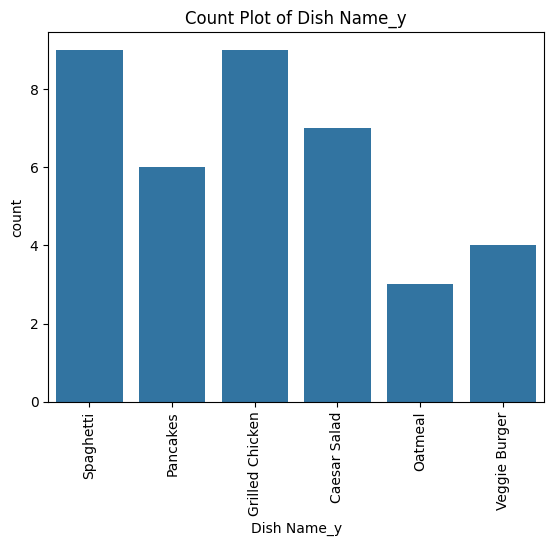

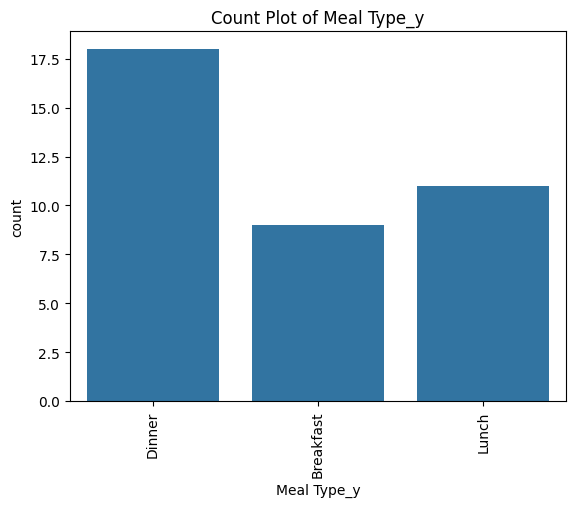

In [70]:
categorical_cols = merged_df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[~categorical_cols.isin(['User ID', 'User Name', 'Phone', 'Email', 'Session ID_x', 'Session ID_y'])]

for i in categorical_cols:
  sns.countplot(data=merged_df,x=i)
  plt.xticks(rotation=90)
  plt.title(f'Count Plot of {i}')
  plt.show()

# Bivariate Analysis

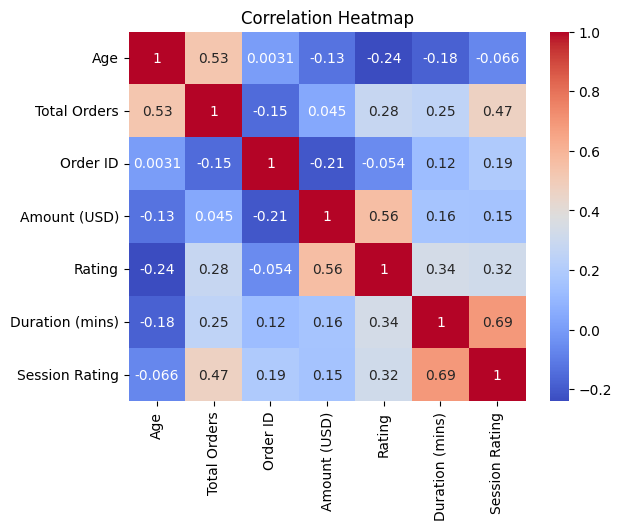

In [80]:
numeric_cols = merged_df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Insights from the Correlation Heatmap:

## Age and Total Orders:
1. There is a moderate positive correlation (0.53) between Age and Total Orders, suggesting that older individuals tend to place more orders.

## Amount (USD) and Rating:
2. There is a strong positive correlation (0.56) between Amount (USD) and Rating, indicating that higher amounts spent are associated with higher ratings.

## Total Orders and Session Rating:
3. There is a moderate positive correlation (0.47) between Total Orders and Session Rating, indicating that individuals who place more orders tend to give higher session ratings.

## Age and Rating:
4. There is a moderate negative correlation (-0.24) between Age and Rating, suggesting that older individuals tend to give lower ratings.

## Duration (mins) and Session Rating:
5. There is a strong positive correlation (0.69) between Duration (mins) and Session Rating, suggesting that longer sessions tend to receive higher ratings.

## Other Notable Correlations:
6. Total Orders and Rating (0.28)
7. Total Orders and Duration (mins) (0.25)
8. Rating and Duration (mins) (0.34)
9. Age and Duration (mins) (-0.18)

## Checking if there is any linear relationship between two variables

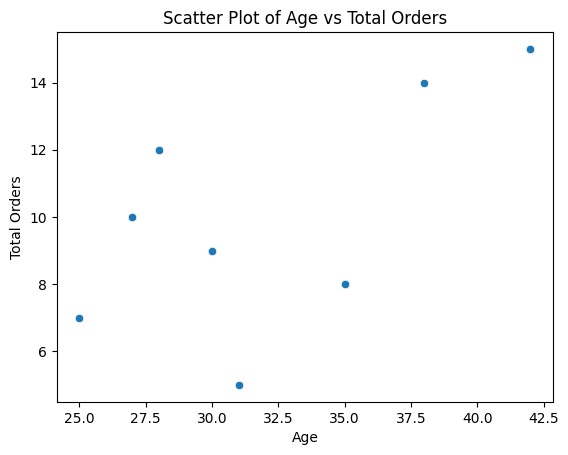

In [81]:
sns.scatterplot(data=merged_df,x='Age',y='Total Orders')
plt.title('Scatter Plot of Age vs Total Orders')
plt.show()

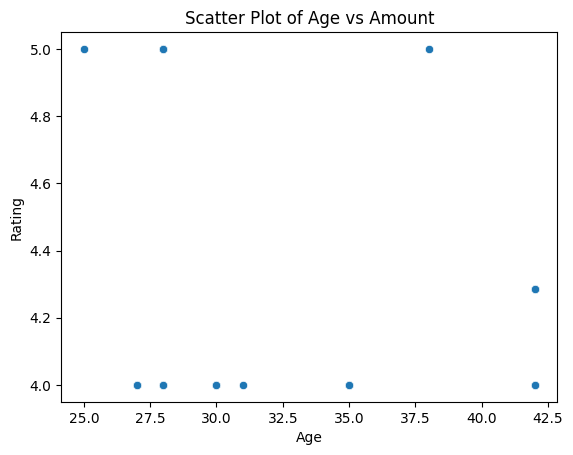

In [86]:
sns.scatterplot(data=merged_df,x='Age',y='Rating')
plt.title('Scatter Plot of Age vs Amount')
plt.show()

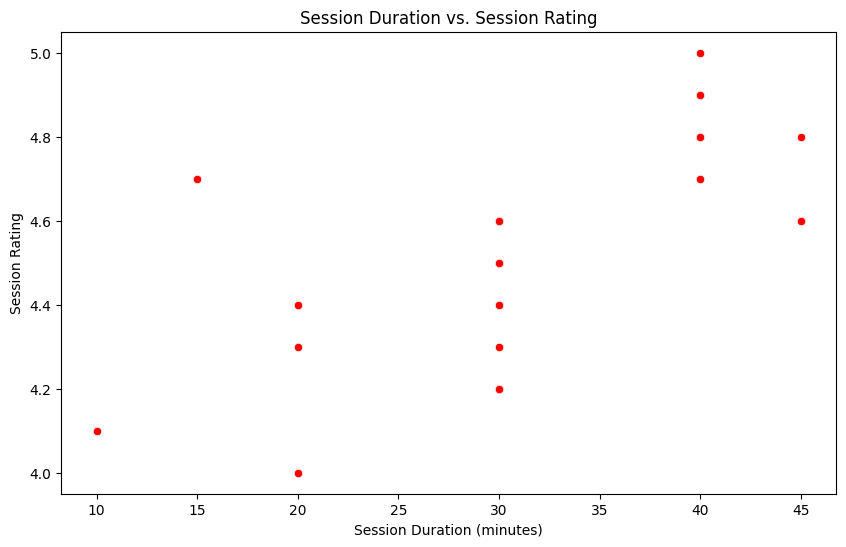

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (mins)', y='Session Rating', data=merged_df, color='red')
plt.title("Session Duration vs. Session Rating")
plt.xlabel("Session Duration (minutes)")
plt.ylabel("Session Rating")
plt.show()

# Multivariate Analysis

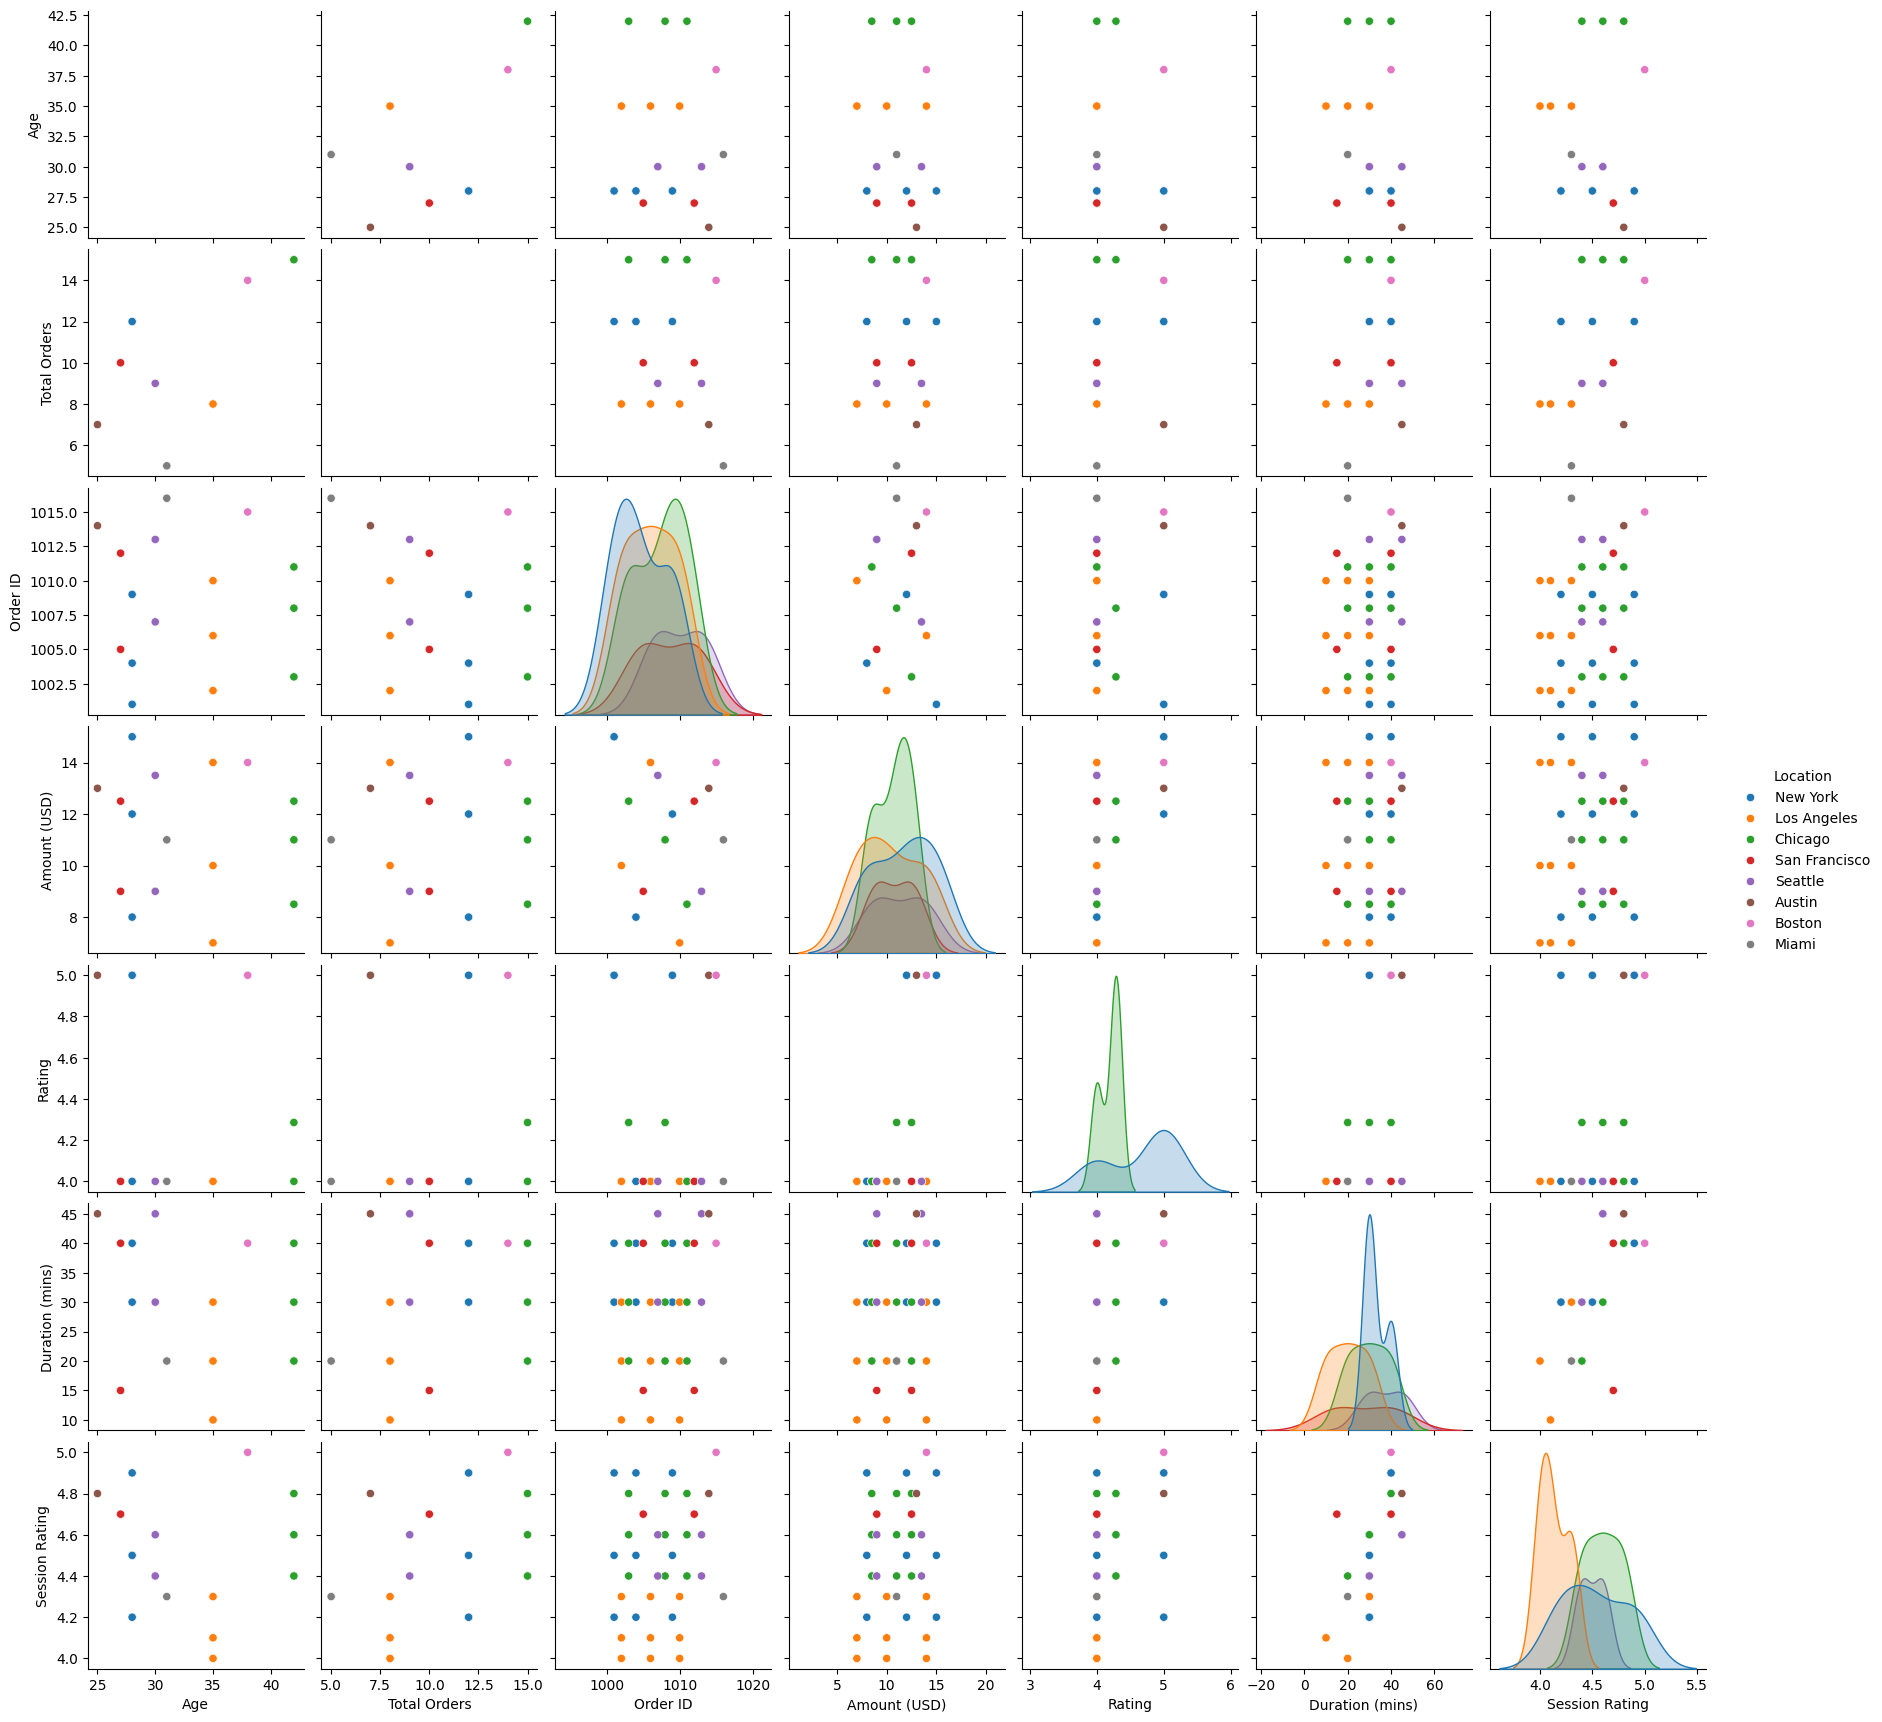

In [87]:
sns.pairplot(merged_df,hue='Location')
plt.show()

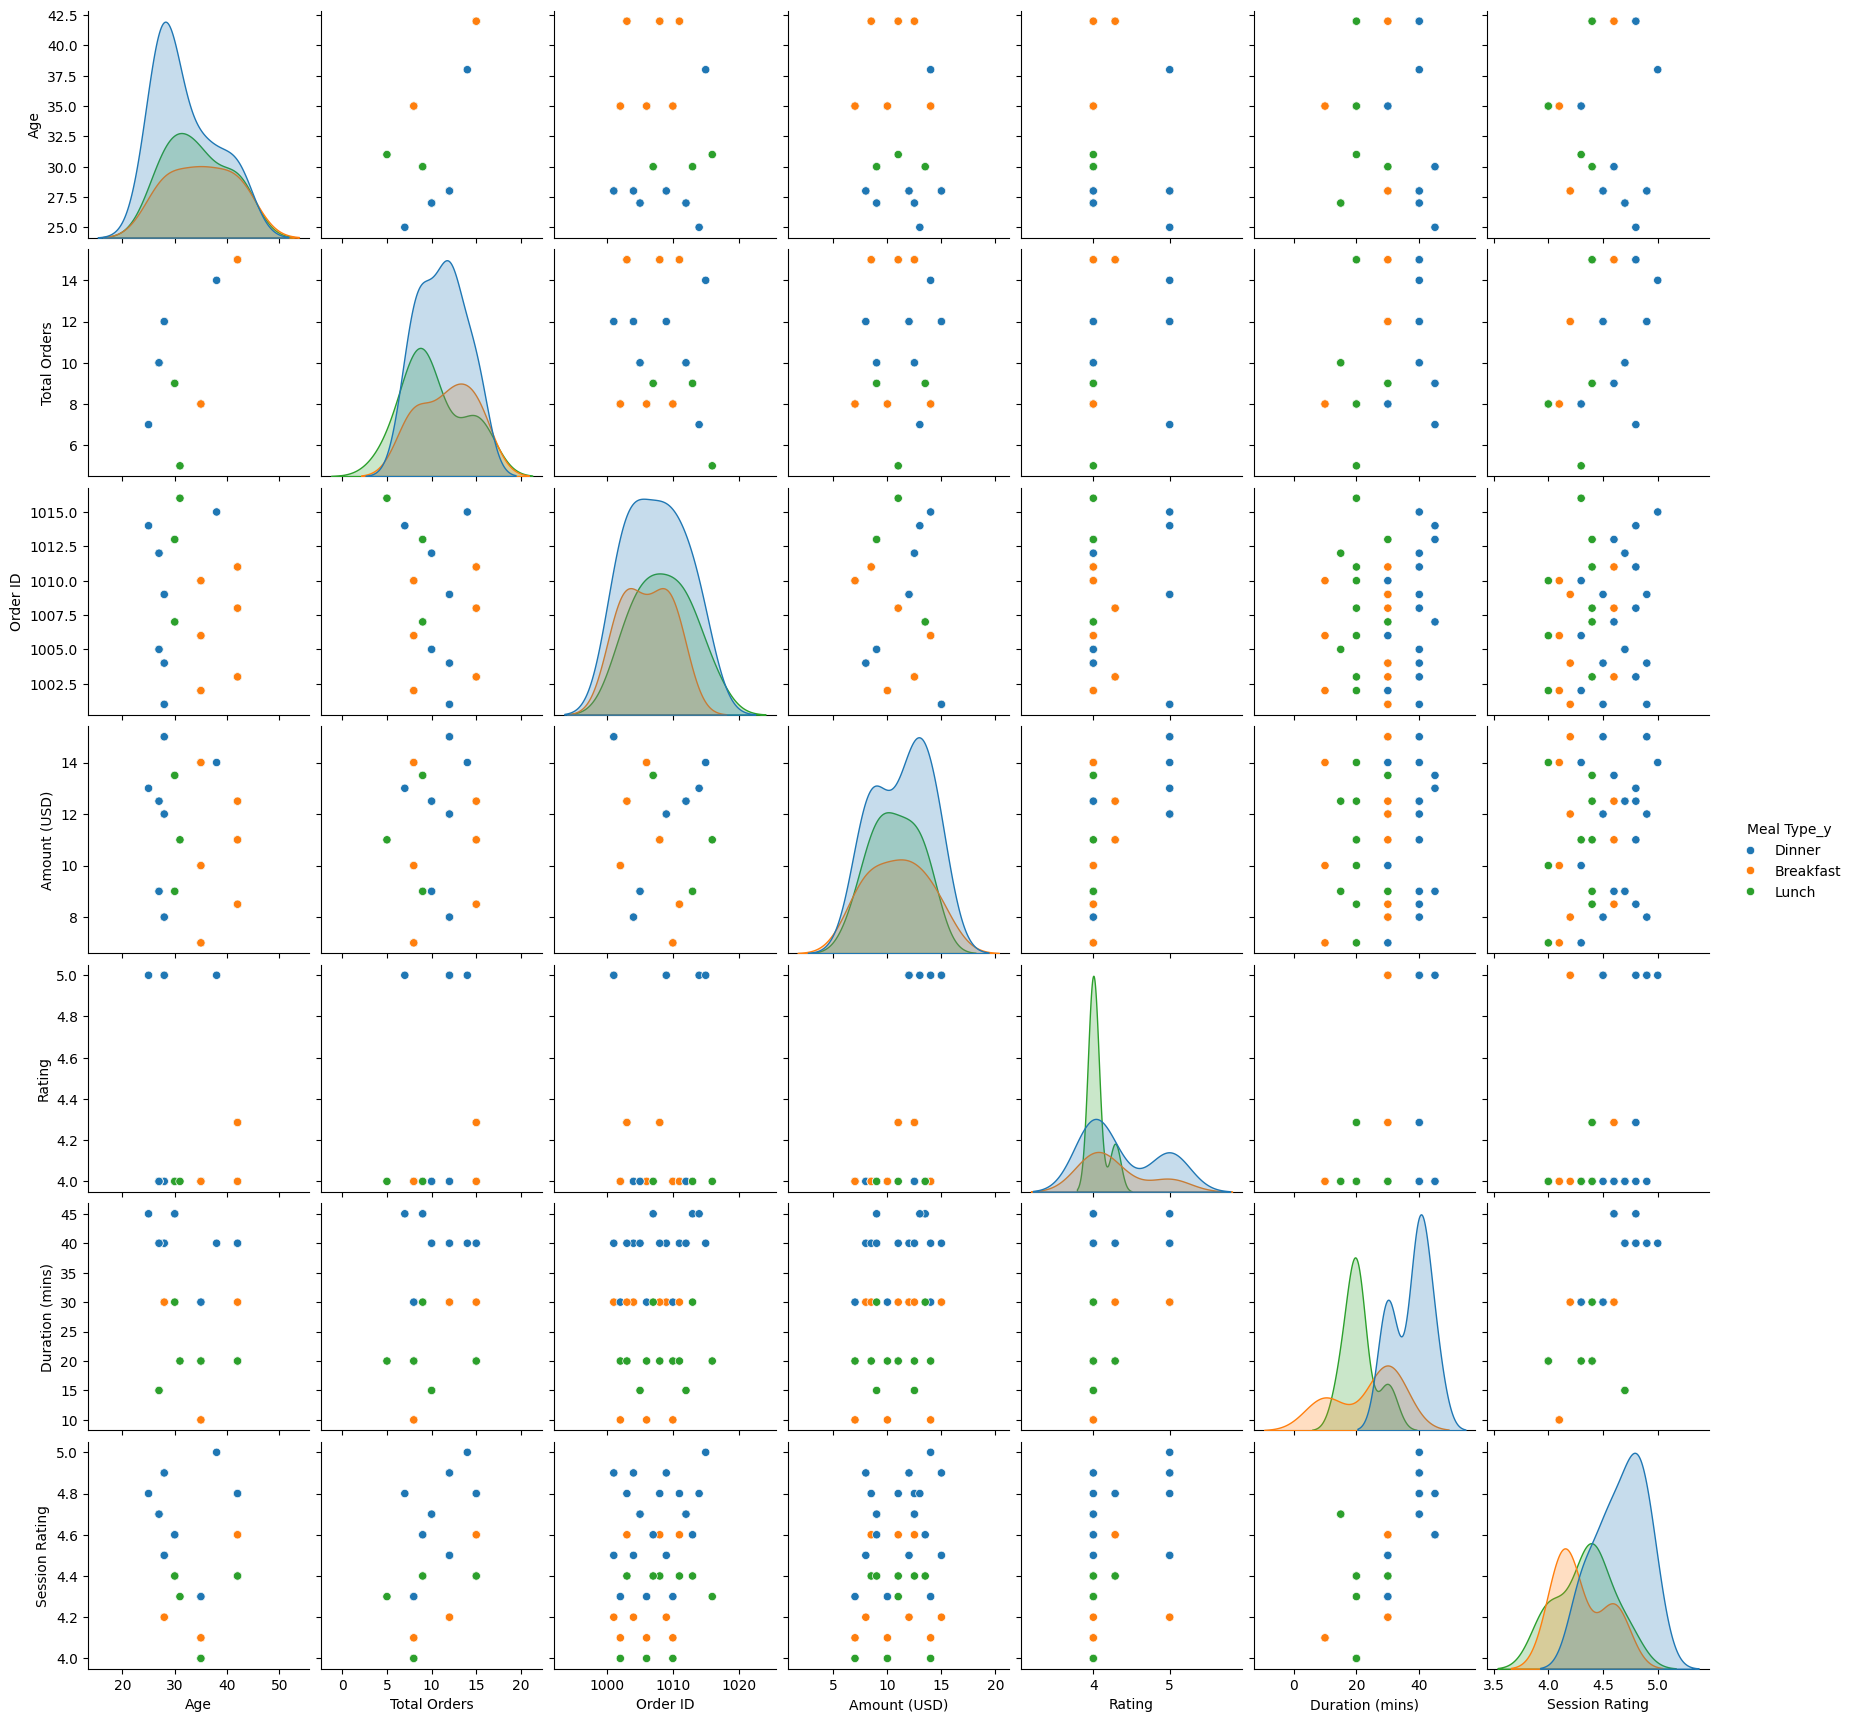

In [90]:
sns.pairplot(merged_df,hue='Meal Type_y')
plt.show()

### The same can be done to check the relation between other variables.

In [92]:
merged_df.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Order ID', 'Order Date',
       'Meal Type_x', 'Dish Name_x', 'Order Status', 'Amount (USD)',
       'Time of Day', 'Rating', 'Session ID_x', 'Session ID_y', 'Dish Name_y',
       'Meal Type_y', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating'],
      dtype='object')

In [93]:
# Grouping by meal types and calculating the average ratings
meal_ratings = merged_df.groupby('Meal Type_x')[['Session Rating', 'Rating']].mean()
meal_ratings

,Session Rating,Rating
Meal Type_x,,
Breakfast,4.422222,4.000000
Dinner,4.533333,4.492063
Lunch,4.445455,4.077922


In [95]:
# Total number of completed orders per dish
dish_orders = merged_df[merged_df['Order Status'] == 'Completed'].groupby('Dish Name_x').size().sort_values(ascending=False)
dish_orders

,0
Dish Name_x,
Spaghetti,9
Caesar Salad,7
Grilled Chicken,6
Pancakes,6
Oatmeal,3
Veggie Burger,1


 Identifying Popular Dishes


In [102]:
popular_dishes = merged_df[merged_df['Order Status']== 'Completed'].groupby('Dish Name_x').size().sort_values(ascending=False)
popular_dishes

,0
Dish Name_x,
Spaghetti,9
Caesar Salad,7
Grilled Chicken,6
Pancakes,6
Oatmeal,3
Veggie Burger,1


Demographic Factors that Influence Behavior

In [104]:
mealxage = merged_df.groupby(['Age', 'Meal Type_x']).size()
mealxage

Age  Meal Type_x
25   Dinner         1
27   Dinner         2
     Lunch          2
28   Breakfast      3
     Dinner         6
30   Dinner         2
     Lunch          2
31   Lunch          1
35   Breakfast      3
     Dinner         3
     Lunch          3
38   Dinner         1
42   Breakfast      3
     Dinner         3
     Lunch          3
dtype: int64

In [105]:
# Average session ratings by location
rating_by_location = merged_df.groupby('Location')['Session Rating'].mean()
rating_by_location

,Session Rating
Location,
Austin,4.800000
Boston,5.000000
Chicago,4.600000
Los Angeles,4.133333
Miami,4.300000
New York,4.533333
San Francisco,4.700000
Seattle,4.500000


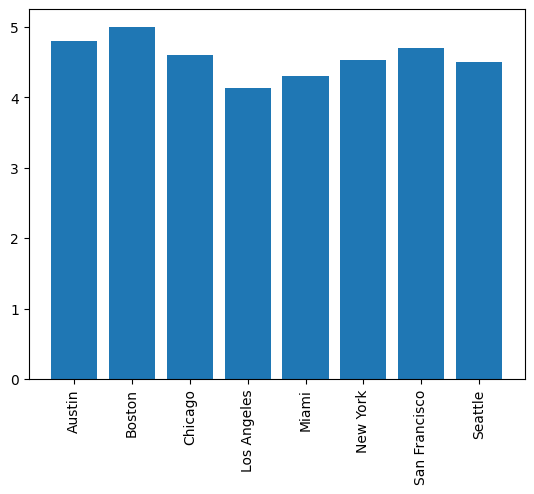

In [138]:
plt.bar(rating_by_location.index,rating_by_location.values)
plt.xticks(rotation=90)
plt.show()

In [107]:
# Orders by location

orders_by_location = merged_df.groupby('Location').size().sort_values(ascending=False)
orders_by_location

,0
Location,
Chicago,9
Los Angeles,9
New York,9
San Francisco,4
Seattle,4
Austin,1
Boston,1
Miami,1


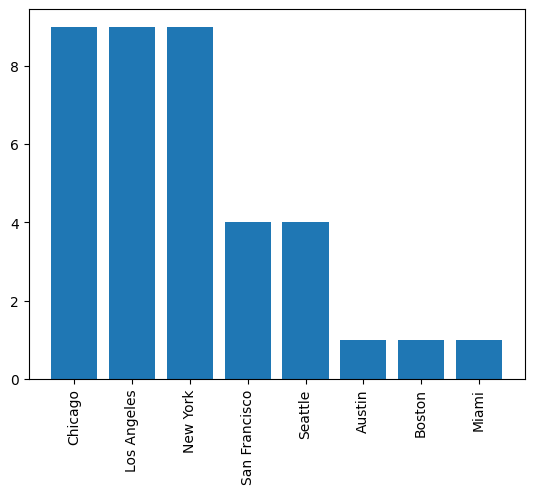

In [139]:
plt.bar(orders_by_location.index,orders_by_location.values)
plt.xticks(rotation=90)
plt.show()

In [108]:
merged_df['Order Month'] = merged_df['Order Date'].dt.month
merged_df['Order Weekday'] = merged_df['Order Date'].dt.day_name()

In [109]:
# Orders completed over time (Monthly)
orders_by_month = merged_df[merged_df['Order Status'] == 'Completed'].groupby('Order Month').size()

,0
Order Month,
12,32


In [110]:
sessions_by_month = merged_df.groupby('Order Month').size()
sessions_by_month

,0
Order Month,
12,38


In [140]:
avg_ratings_by_month = merged_df.groupby('Order Month')['Session Rating'].mean()
avg_ratings_by_month

,Session Rating
Order Month,
12,4.481579


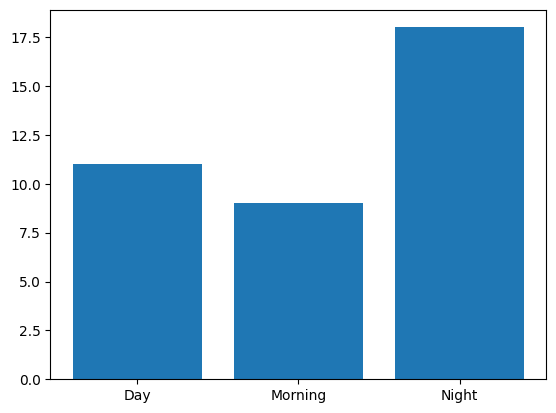

In [134]:
count_of_orders_based_on_time_of_day = merged_df.groupby('Time of Day')['Order ID'].count()
plt.bar(count_of_orders_based_on_time_of_day.index,count_of_orders_based_on_time_of_day.values)
plt.show()

In [127]:
orders_by_weekday = merged_df[merged_df['Order Status'] == 'Completed'].groupby('Order Weekday').size().sort_values(ascending=False)
orders_by_weekday

,0
Order Weekday,
Sunday,8
Thursday,6
Friday,5
Tuesday,5
Monday,3
Saturday,3
Wednesday,2


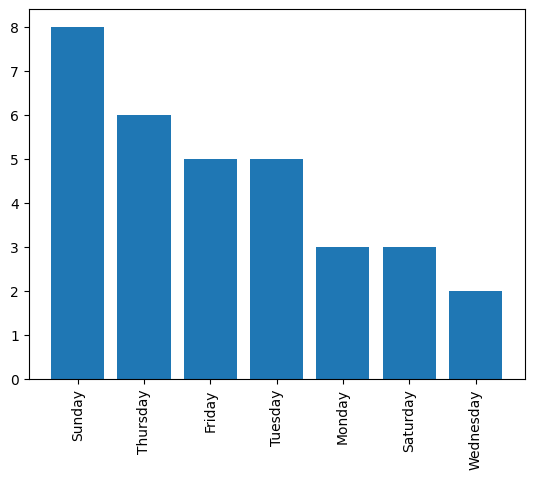

In [142]:
plt.bar(orders_by_weekday.index,orders_by_weekday.values)
plt.xticks(rotation=90)
plt.show()

In [126]:
sessions_by_weekday = merged_df.groupby('Order Weekday').size().sort_values(ascending=True)
sessions_by_weekday

,0
Order Weekday,
Saturday,3
Friday,5
Tuesday,5
Wednesday,5
Monday,6
Thursday,6
Sunday,8


In [122]:
ratings_by_weekday = merged_df.groupby('Order Weekday')['Session Rating'].mean()
ratings_by_weekday

,Session Rating
Order Weekday,
Friday,4.640000
Monday,4.566667
Saturday,4.600000
Sunday,4.412500
Thursday,4.333333
Tuesday,4.360000
Wednesday,4.560000


# Trend analysis

In [147]:
daywise_analysis = merged_df.groupby('Order Weekday').agg({
    'Order ID': 'count',
    'Amount (USD)': 'sum',
    'Rating': 'mean'
}).reset_index()

daywise_analysis.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
daywise_analysis

,Order Weekday,Total Orders,Amount (USD),Rating
0,Friday,5,50.5,4.000000
1,Monday,6,61.5,4.142857
2,Saturday,3,31.0,4.333333
3,Sunday,8,100.0,4.500000
4,Thursday,6,57.0,4.500000
5,Tuesday,5,60.0,4.000000
6,Wednesday,5,60.0,4.171429


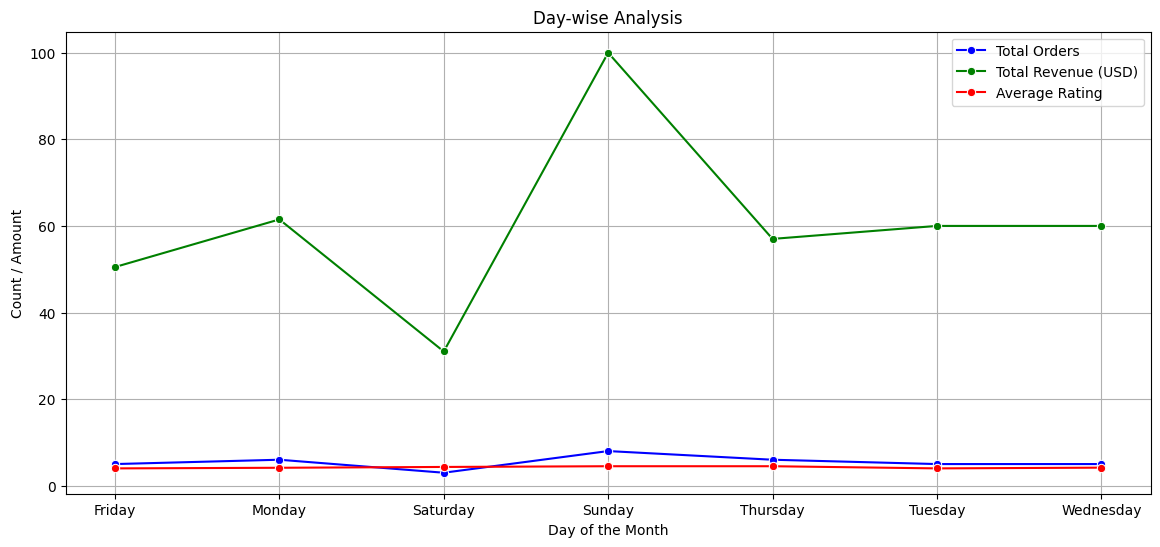

In [148]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daywise_analysis, x='Order Weekday', y='Total Orders', marker='o', label='Total Orders', color='blue')
sns.lineplot(data=daywise_analysis, x='Order Weekday', y='Amount (USD)', marker='o', label='Total Revenue (USD)', color='green')
sns.lineplot(data=daywise_analysis, x='Order Weekday', y='Rating', marker='o', label = 'Average Rating', color='red')

plt.title('Day-wise Analysis')
plt.xlabel('Day of the Month')
plt.ylabel('Count / Amount')
plt.legend()
plt.grid(True)
plt.show()


In [149]:
meal_type_rating = merged_df.groupby('Meal Type_x')['Session Rating'].mean()
meal_type_rating

,Session Rating
Meal Type_x,
Breakfast,4.422222
Dinner,4.533333
Lunch,4.445455


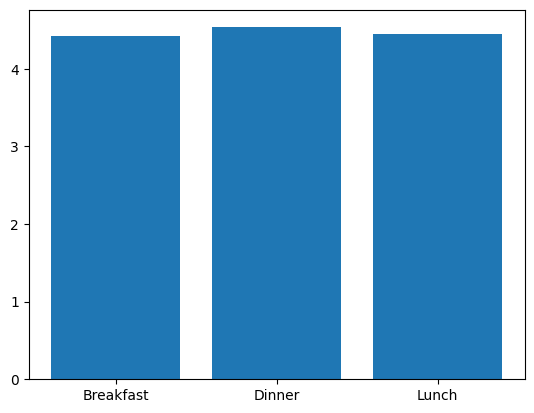

In [150]:
plt.bar(meal_type_rating.index,meal_type_rating.values)
plt.show()

In [158]:
dish_meal_type = merged_df.groupby(['Meal Type_x', 'Dish Name_x']).size()
dish_meal_type

Meal Type_x  Dish Name_x    
Breakfast    Oatmeal            3
             Pancakes           6
Dinner       Grilled Chicken    9
             Spaghetti          9
Lunch        Caesar Salad       7
             Veggie Burger      4
dtype: int64

# Cancellation Analysis

In [159]:
canceled_orders = merged_df[merged_df['Order Status'] == 'Canceled']
canceled_orders

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Order ID,...,Session ID_y,Dish Name_y,Meal Type_y,Session Start,Session End,Duration (mins),Session Rating,Order Month,Order Weekday,Year-Month
18,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,1003.0,...,S003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40.0,4.8,12,Monday,2024-12
19,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,1003.0,...,S008,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20.0,4.4,12,Monday,2024-12
20,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,1003.0,...,S011,Pancakes,Breakfast,2024-12-06 08:00:00,2024-12-06 08:30:00,30.0,4.6,12,Monday,2024-12
21,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,1008.0,...,S003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40.0,4.8,12,Wednesday,2024-12
22,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,1008.0,...,S008,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20.0,4.4,12,Wednesday,2024-12
23,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,1008.0,...,S011,Pancakes,Breakfast,2024-12-06 08:00:00,2024-12-06 08:30:00,30.0,4.6,12,Wednesday,2024-12


In [161]:
canceled_dishes = canceled_orders.groupby('Dish Name_x').size().sort_values(ascending=False)
canceled_dishes

,0
Dish Name_x,
Grilled Chicken,3
Veggie Burger,3


In [163]:
canceled_meal_type = canceled_orders.groupby('Meal Type_x').size()
canceled_meal_type

,0
Meal Type_x,
Dinner,3
Lunch,3


In [164]:
canceled_location = canceled_orders.groupby('Location').size()
canceled_location

,0
Location,
Chicago,6


In [165]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [166]:
!git config --global user.name "charangovind29"
!git config --global user.email "charangovind2000@gmail.com"

In [167]:
! git clone https://github.com/charangovind29/Data-Analyst-Assignment-Uplaince

Cloning into 'Data-Analyst-Assignment-Uplaince'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [168]:
%cd Data-Analyst-Assignment-Uplaince

/content/Data-Analyst-Assignment-Uplaince


In [173]:
! mv /content/drive/MyDrive/DataAnalystInternAssignment/content/Data-Analyst-Assignment-Uplaince

mv: missing destination file operand after '/content/drive/MyDrive/DataAnalystInternAssignment/content/Data-Analyst-Assignment-Uplaince'
Try 'mv --help' for more information.


In [175]:
!ls /content/drive/MyDrive/DataAnalystInternAssignment


Uplaince_assignment.ipynb  Uplaince.xlsx
